In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/datasets_4458_8204_winequality-red.csv')

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Text(0, 0.5, 'sulphates')

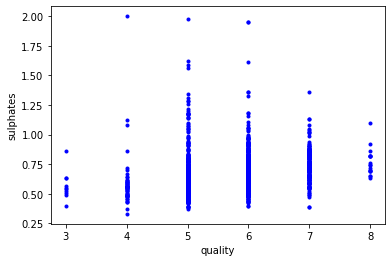

In [ ]:
plt.plot(data['quality'], data['sulphates'], 'b.')
plt.xlabel('quality')
plt.ylabel('sulphates')

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
dtrain = y_train.reshape(len(y_train), 1)
dtest = y_test.reshape(len(y_test), 1)

In [ ]:
x_sc = StandardScaler()
y_sc = StandardScaler()

In [ ]:
xd_train = x_sc.fit_transform(x_train)
yd_train = y_sc.fit_transform(dtrain)

In [ ]:
xd_test = x_sc.transform(x_test)
yd_test = y_sc.transform(dtest)

In [ ]:
xd_train

array([[-0.87406646,  0.35052608, -0.86794498, ...,  0.62227461,
         0.0846121 , -0.67909015],
       [-0.53109024,  0.62687623, -0.51170277, ..., -0.21145302,
        -0.95772274, -0.86740865],
       [ 1.24095359, -1.47338493,  1.01504958, ..., -0.85278197,
         2.35322323,  0.45082084],
       ...,
       [ 0.15486221, -1.08649472,  0.65880737, ..., -0.08318723,
        -1.08035037, -0.9615679 ],
       [-0.18811401,  1.56646675, -0.10456881, ..., -0.78864908,
        -1.44823325, -1.1498864 ],
       [ 0.38351303,  0.29525605, -0.10456881, ..., -0.5321175 ,
        -0.52852604, -0.67909015]])

In [ ]:
yd_train

array([[-0.78785435],
       [-0.78785435],
       [ 1.675876  ],
       ...,
       [-0.78785435],
       [-0.78785435],
       [-0.78785435]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
r_reg = RandomForestRegressor()
l_reg = LinearRegression()
d_reg = DecisionTreeRegressor()
s_reg = SVR()
p_reg = LinearRegression()

In [ ]:
x_pol = PolynomialFeatures(degree=5)
x_pol = x_pol.fit_transform(xd_train)

In [ ]:
temp = PolynomialFeatures(degree=5)
temp = temp.fit_transform(xd_test)

In [ ]:
r_reg.fit(xd_train, yd_train)
l_reg.fit(xd_train, yd_train)
d_reg.fit(xd_train, yd_train)
s_reg.fit(xd_train, yd_train)
p_reg.fit(x_pol, yd_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r_pred = r_reg.predict(xd_test)
l_pred = l_reg.predict(xd_test)
d_pred = d_reg.predict(xd_test)
s_pred = s_reg.predict(xd_test)
p_pred = p_reg.predict(temp)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r = r2_score(yd_test, r_pred)
l = r2_score(yd_test, l_pred)
d = r2_score(yd_test, d_pred)
s = r2_score(yd_test, s_pred)
p = r2_score(yd_test, p_pred)

In [ ]:
print('Random Forest: ' + str(r) + '\nLinear Regression: ' + str(l) + '\nDecision Tree: ' + str(d) + '\nSVR: ' + str(s)  + '\nPolynomial Features: ' + str(p))

Random Forest: 0.4984664125848899
Linear Regression: 0.2963325618288125
Decision Tree: 0.04640913439671257
SVR: 0.4217416673114359
Polynomial Features: -927.5210889009702


In [ ]:
cond = [(data['quality']>=7.5), (data['quality']<7.5)]
gb = ['Good', 'Bad']
data['review'] = np.select(cond, gb)

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad
